## Setup e leitura dos dados

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 8)

df = pd.read_csv("leading_causes_of_death.csv")

df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['deaths'] = pd.to_numeric(df['deaths'], errors='coerce')
df = df.dropna(subset=['year', 'deaths'])

df_filtered = df[df['cause_of_death'].str.lower() != "all causes"]
df_filtered.head()

,rank_order,group,year,cause_of_death,flag,deaths
1,1.0,All persons,1980,Diseases of heart,NaN,761085.0
2,2.0,All persons,1980,Malignant neoplasms,NaN,416509.0
3,3.0,All persons,1980,Cerebrovascular diseases,NaN,170225.0
4,4.0,All persons,1980,Unintentional injuries,NaN,105718.0
5,5.0,All persons,1980,Chronic obstructive pulmonary diseases,NaN,56050.0


## Top 10 causas de morte no geral

Total de mortes por causa (todas as demografias) em ordem

cause_of_death
Diseases of heart                      2966579.0
Diseases of heart                      2456874.0
Malignant neoplasms                    2330382.0
Malignant neoplasms                    1617671.0
Cerebrovascular diseases                659403.0
Chronic lower respiratory diseases      557464.0
Cerebrovascular diseases                529498.0
Unintentional injuries                  493392.0
Unintentional injuries                  407260.0
Alzheimer's disease                     311098.0
Name: deaths, dtype: float64


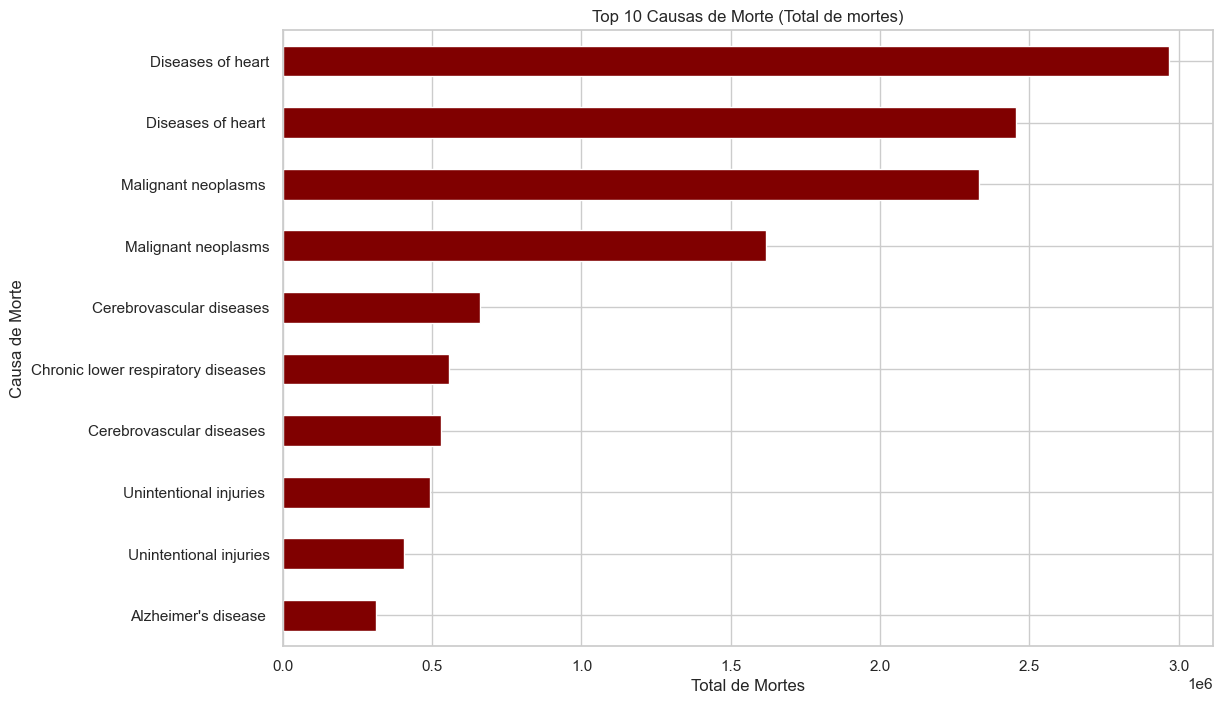

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\amand\\Downloads\\leading_causes_of_death\\images\\top10_deaths.png'

<Figure size 1200x800 with 0 Axes>

In [47]:
top_causes = df_filtered.groupby('cause_of_death')['deaths'].sum().sort_values(ascending=False)

top10 = top_causes.head(10)
print(top10)

top10.plot(kind='barh', color='maroon')
plt.title("Top 10 Causas de Morte (Total de mortes)")
plt.xlabel("Total de Mortes")
plt.ylabel("Causa de Morte")
plt.gca().invert_yaxis()
plt.show()

plt.savefig("images/top10_deaths.png", dpi=300, bbox_inches='tight')

## Série temporal das maiores causas
Quantidade de mortes das principais causas e evolução entre os anos.

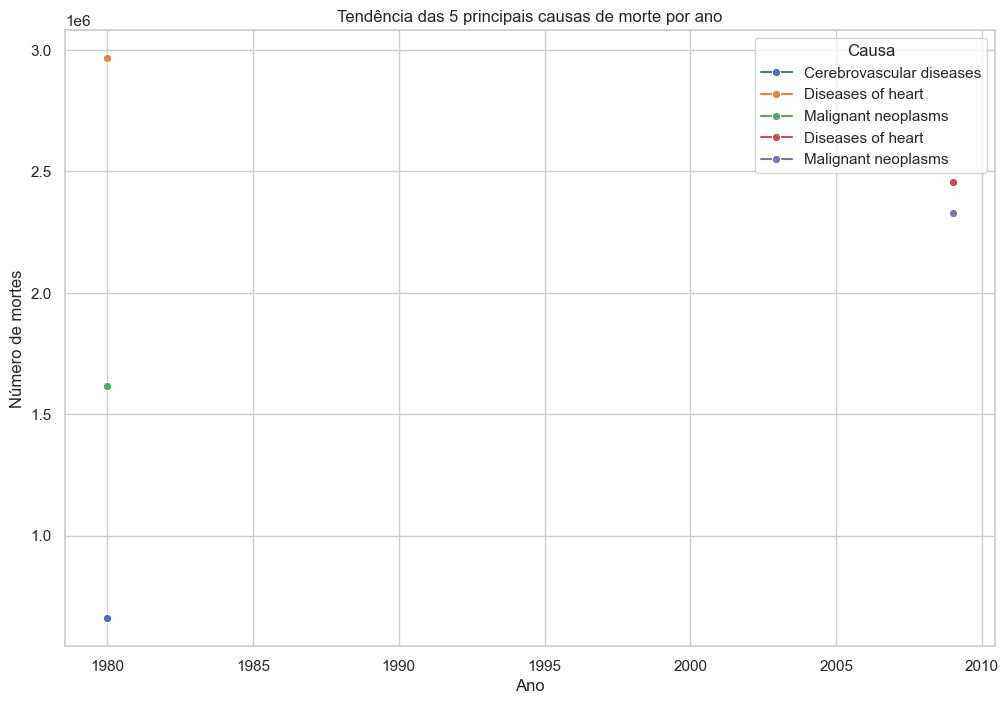

In [11]:
top5 = top10.index[:5].tolist()

df_top5 = df_filtered[df_filtered['cause_of_death'].isin(top5)]

df_year = df_top5.groupby(['year','cause_of_death'])['deaths'].sum().reset_index()

sns.lineplot(data=df_year, x='year', y='deaths', hue='cause_of_death', marker="o")
plt.title("Tendência das 5 principais causas de morte por ano")
plt.ylabel("Número de mortes")
plt.xlabel("Ano")
plt.legend(title='Causa')
plt.show()

## Regressão linear para previsão de mortes futuras

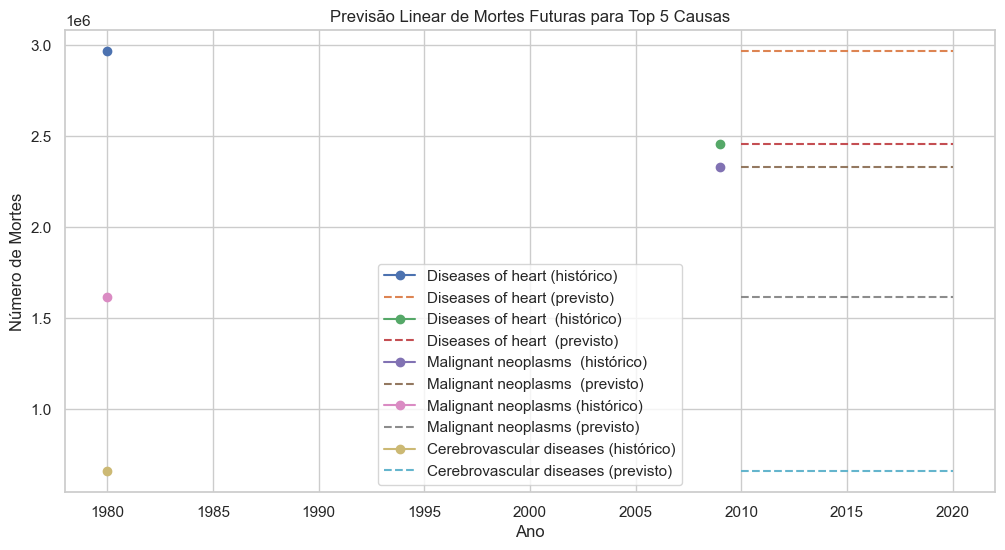

In [28]:
future_years = np.array([2010, 2015, 2020]).reshape(-1,1)  # anos futuros para prever

plt.figure(figsize=(12,6))
for cause in top5_causes:
    subset = df_growth[df_growth['cause_of_death'] == cause]
    X = subset['year'].values.reshape(-1,1)
    y = subset['deaths'].values

    # Modelo
    model = LinearRegression()
    model.fit(X, y)
    y_pred_future = model.predict(future_years)
    
    # Plot histórico
    plt.plot(X, y, marker='o', label=f"{cause} (histórico)")
    
    # Plot previsão
    plt.plot(future_years, y_pred_future, linestyle='--', label=f"{cause} (previsto)")

plt.title("Previsão Linear de Mortes Futuras para Top 5 Causas")
plt.xlabel("Ano")
plt.ylabel("Número de Mortes")
plt.legend()
plt.show()

## Comparar causas por grupo étnico

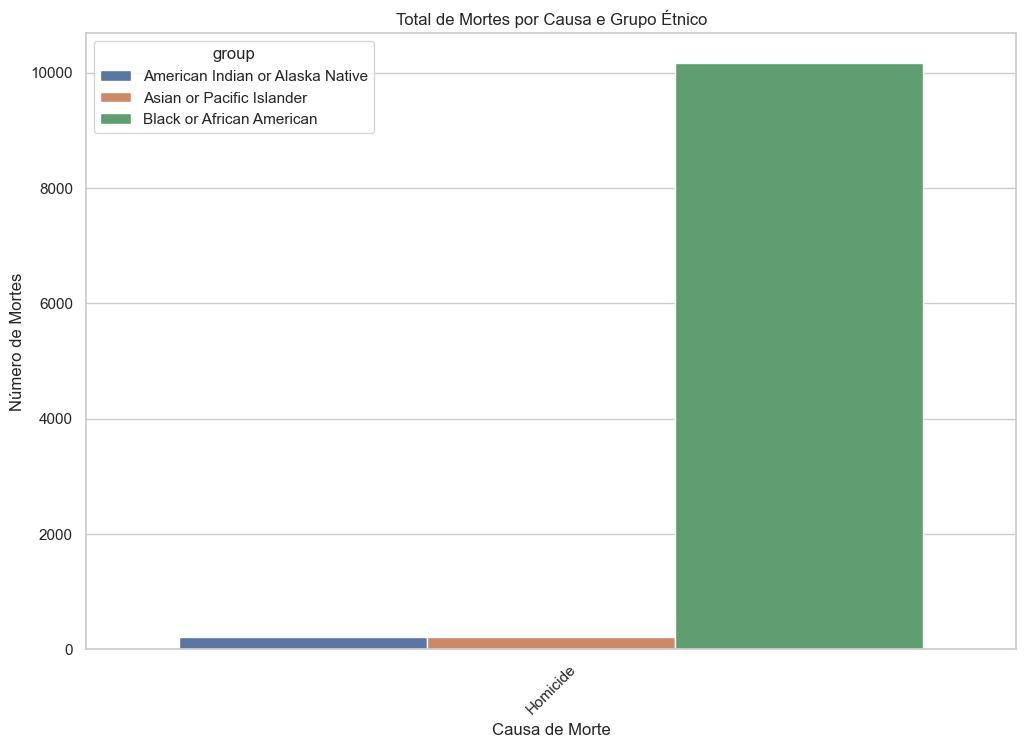

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\amand\\Downloads\\leading_causes_of_death\\images\\cause_of_death_group.png'

<Figure size 1200x800 with 0 Axes>

In [51]:
# Filtrar grupos raciais principais
races = ['White', 'Black or African American', 'American Indian or Alaska Native', 'Asian or Pacific Islander', 'Hispanic or Latino']
df_race = df_filtered[df_filtered['group'].isin(races)]

df_race_top5 = df_race[df_race['cause_of_death'].isin(top5_causes)]
df_race_sum = df_race_top5.groupby(['group','cause_of_death'])['deaths'].sum().reset_index()

sns.barplot(data=df_race_sum, x='cause_of_death', y='deaths', hue='group')
plt.title("Total de Mortes por Causa e Grupo Étnico")
plt.ylabel("Número de Mortes")
plt.xlabel("Causa de Morte")
plt.xticks(rotation=45)
plt.show()
plt.savefig("images/cause_of_death_group.png", dpi=300, bbox_inches='tight')

## Mortalidade por sexo

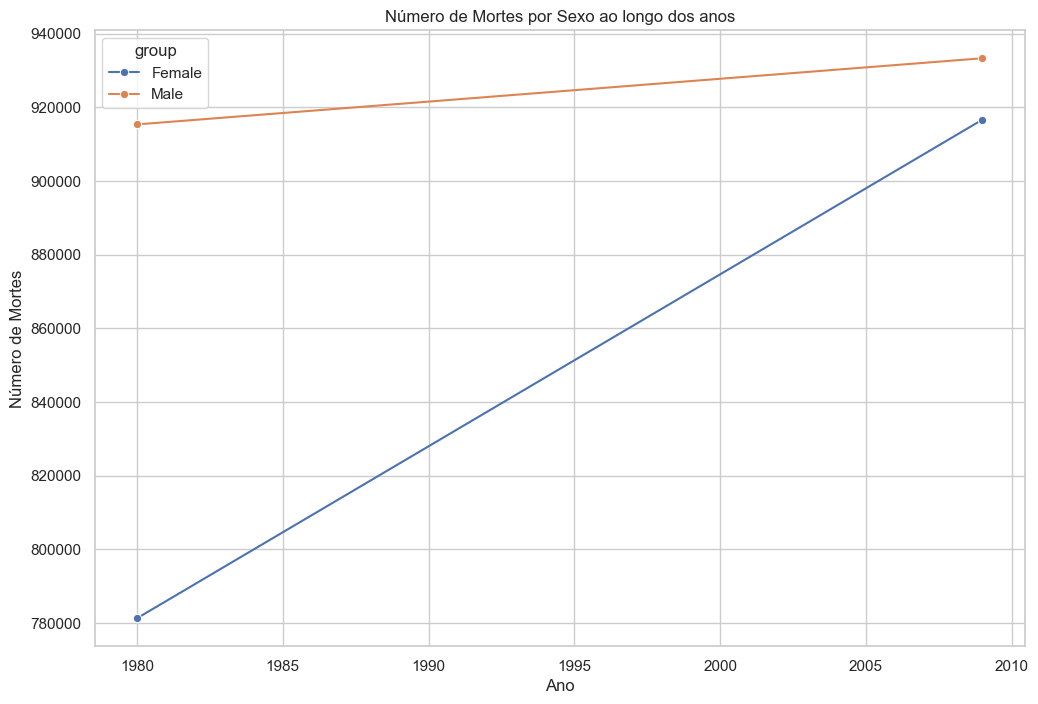

<Figure size 1200x800 with 0 Axes>

In [55]:
df_sex = df_filtered[df_filtered['group'].isin(['Male','Female'])]
df_sex_sum = df_sex.groupby(['year','group'])['deaths'].sum().reset_index()

sns.lineplot(data=df_sex_sum, x='year', y='deaths', hue='group', marker='o')
plt.title("Número de Mortes por Sexo ao longo dos anos")
plt.ylabel("Número de Mortes")
plt.xlabel("Ano")
plt.show()
plt.savefig("images/group_deaths.png", dpi=300, bbox_inches='tight')